In [2]:
import pandas as pd
import numpy as np

In [63]:
advt=pd.read_csv("advertising.csv")
advt.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

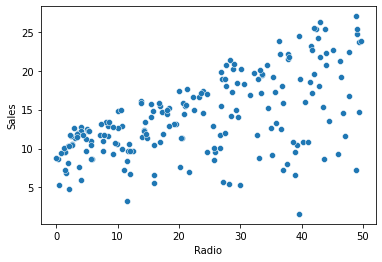

In [65]:
sns.scatterplot(x="Radio",y="Sales",data=advt)
plt.show()

In [66]:
X=advt[["Radio"]]
X.head()

,Radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [67]:
Y=advt[["Sales"]]
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [68]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7 ,random_state=80)

In [91]:
X_train.head()

,Radio
179,10.0
71,14.3
66,24.6
125,11.8
83,44.5


In [92]:
X_test.head()

,Radio
109,26.9
161,35.8
142,33.2
168,23.6
61,42.7


In [93]:
Y_train.head()

,Sales
179,12.6
71,12.4
66,9.5
125,10.6
83,13.6


In [94]:
Y_test.head()

,Sales
109,19.8
161,13.3
142,20.1
168,17.1
61,24.2


In [95]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(140, 1)
(60, 1)
(140, 1)
(60, 1)


## Performing Linear Regression

In [96]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()
# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

In [97]:
print(lr.intercept_)
print(lr.coef_)


[8.96658456]
[[0.21521482]]


y = 9.2479 + (0.2010 X Sales)

## Predictions
We can use model for predictions with either existing or new data. To obtain the predicted response, use .predict():

In [18]:
# Making predictions on the testing set
Y_pred = lr.predict(X_test)

In [19]:
Y_pred[:5]

array([[14.26249111],
       [16.25367798],
       [11.09469384],
       [14.4073047 ],
       [11.31191422]])

In [20]:
Y_test[:5]

,Sales
138,9.6
118,15.9
151,11.6
80,11.8
51,10.7


In [21]:
#lets predict y when radio adv= 44.5
sales_predicted = lr.predict([[44.5]])
sales_predicted

array([[17.62940708]])

Text(0, 0.5, 'Sales')

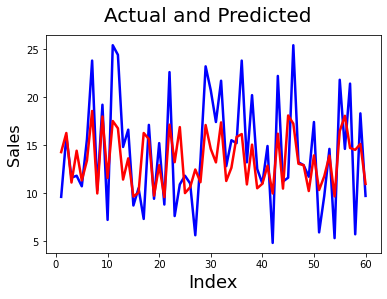

In [24]:
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

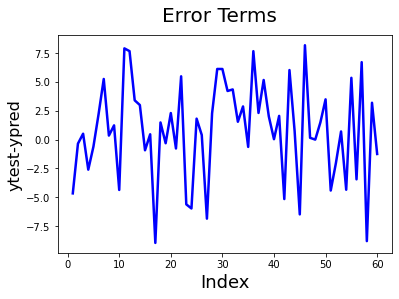

In [25]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)         

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mse=mean_squared_error(Y_test,Y_pred)
mse

18.182917842523853

Text(0, 0.5, 'Predicted Y')

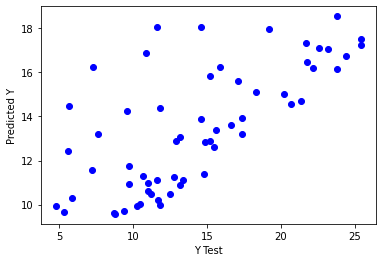

In [29]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,Y_pred,color=["blue"])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

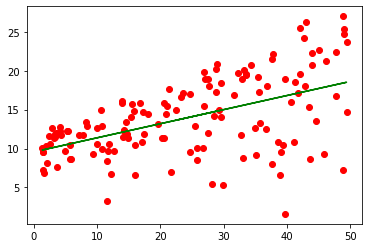

In [30]:
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.show()

Text(0, 0.5, 'Predicted Y')

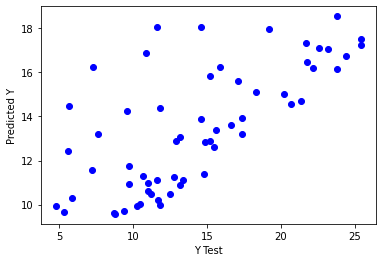

In [31]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,Y_pred,color=["blue"])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0.5, 0.98, 'Actual and Predicted')

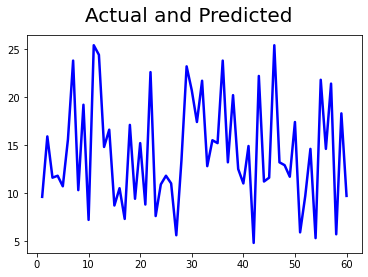

In [32]:
fig = plt.figure()
c = [i for i in range(1,61,1)]
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
#plt.plot(Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading   

Text(0, 0.5, 'ytest-ypred')

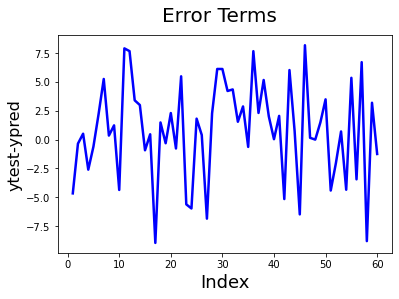

In [33]:
fig = plt.figure()
c = [i for i in range(1,61,1)]
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)

## Multiple linear regression

In [34]:
advt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
X1=advt[['TV','Radio','Newspaper',]]
X1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [36]:
Y1= advt[['Sales']]
Y1.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [37]:
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

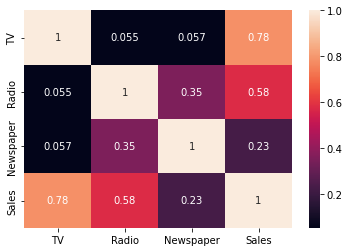

In [38]:
sns.heatmap(advt.corr(),annot=True)

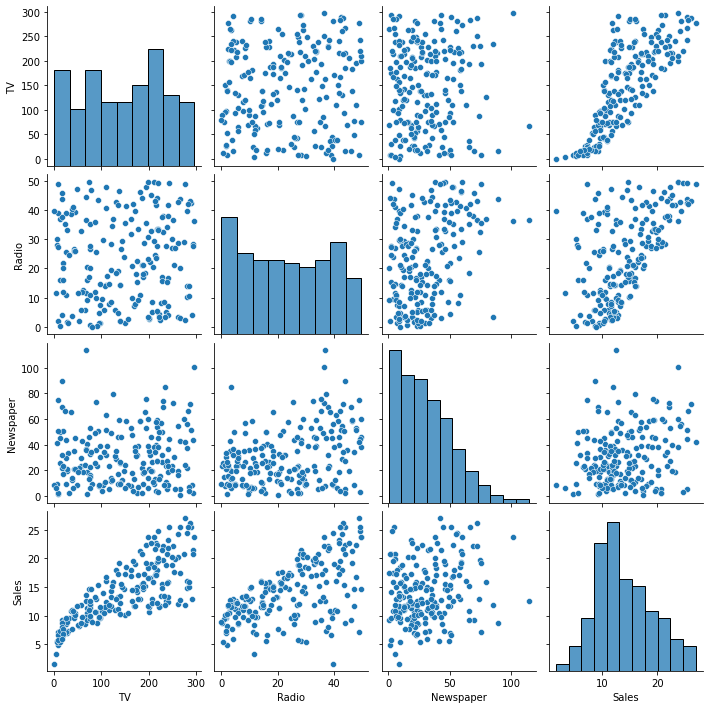

In [39]:
sns.pairplot(advt)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


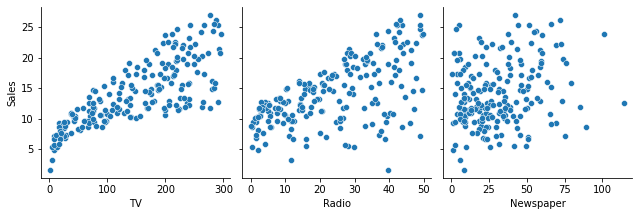

In [40]:
sns.pairplot(advt,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=3,kind='scatter')

In [41]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, train_size=0.6 , random_state=100)

In [42]:
X1_train[:5]

,TV,Radio,Newspaper
12,23.8,35.1,65.9
16,67.8,36.6,114.0
101,296.4,36.3,100.9
120,141.3,26.8,46.2
45,175.1,22.5,31.5


In [43]:
print(X1_train.shape)

(120, 3)


In [44]:
X1_train.head()

,TV,Radio,Newspaper
12,23.8,35.1,65.9
16,67.8,36.6,114.0
101,296.4,36.3,100.9
120,141.3,26.8,46.2
45,175.1,22.5,31.5


In [45]:
Y1_train[:5]

,Sales
12,9.2
16,12.5
101,23.8
120,15.5
45,14.9


In [46]:
Y1_train.head()

,Sales
12,9.2
16,12.5
101,23.8
120,15.5
45,14.9


## Performing Linear Regression

In [47]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression


# Representing LinearRegression as lr(Creating LinearRegression Object)
lr2 = LinearRegression()



# Fit the model using lr.fit()
lr2.fit(X1_train,Y1_train)

LinearRegression()

In [48]:
print(lr2.intercept_)
print(lr2.coef_)

[2.55187165]
[[0.04620672 0.18396534 0.00859204]]


In [49]:
coeff_df = pd.DataFrame(lr2.coef_)
coeff_df

,0,1,2
0,0.046207,0.183965,0.008592


Y= ( 21.9206 + 27.5800 + 6.821 + 6.821 ) + ( [ 0.00995 X Radio ] + [ 0.02523 X Newspaper ] + [ 0.0482 X Sales ]  )

In [50]:
Y1_pred = lr2.predict(X1_test)

In [51]:
Y1_pred[:5]

array([[10.50329323],
       [19.91386212],
       [16.86475008],
       [19.2808446 ],
       [20.91005495]])

In [52]:
Y1_test[:5]

,Sales
126,6.6
104,20.7
99,17.2
92,19.4
111,21.8


In [53]:
sales_predicted = lr2.predict([[300,400,500]])

In [54]:
sales_predicted

array([[94.29604644]])

In [55]:
print(Y1_train.shape)
print(Y1_test.shape)
print(X1_train.shape)
print(X1_test.shape)

(120, 1)
(80, 1)
(120, 3)
(80, 3)


In [57]:
Y1_train=Y1_train[:,  np.newaxis,]

TypeError: '(None, slice(None, None, None))' is an invalid key

In [ ]:
plt.plot(Y1_train, lr.predict(X1_train), color = "green")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,Y1_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y1_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

In [ ]:
sns.heatmap(advt.corr(),annot=True)

In [ ]:
X1_train_new=X1_train[['TV','Radio']]
X1_test_new=X1_test[['TV','Radio']]

In [ ]:
lr2.fit(X1_train,Y1_train)